**Vamos experimentar agora o algoritmo Random Forest?**

Veja: Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

In [24]:
!pip -q install yellowbrick
!pip install treeinterpreter

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

In [26]:
import pickle
with open('./content/sample_data/titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [27]:
X_treino

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,0
733,2,1,23.0,0,0,13.0000,0
382,3,1,32.0,0,0,7.9250,0
704,3,1,26.0,1,0,7.8542,0
813,3,0,6.0,4,2,31.2750,0
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,0
270,1,1,28.0,0,0,31.0000,0
860,3,1,41.0,2,0,14.1083,0
435,1,0,14.0,1,2,120.0000,0


In [28]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
 
# Carregando o dataset iris
iris = load_iris()
X, y = iris.data, iris.target
 
def objective(trial):
    # Definição do espaço de hiperparâmetros
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30) # Inteiro, sem escala log
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5, 0.7, 1.0])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False]) # log=True para valores mais próximos a 1
 
    # Criação do modelo
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, bootstrap=bootstrap, random_state=42)
     
    # Treinamento do modelo
    model.fit(X_treino, y_treino)
     
    # Predição nos dados de teste
    y_pred = model.predict(X_teste)
     
    # Retorna a acurácia como objetivo
    return accuracy_score(y_teste, y_pred)
 
# Criação do estudo Optuna
study = optuna.create_study(direction='maximize') # Maximizar a acurácia
 
# Otimização
study.optimize(objective, n_trials=100) # número de tentativas
 
# Impressão dos melhores hiperparâmetros
print("Melhores hiperparâmetros:", study.best_params)
print("Melhor acurácia:", study.best_value)
 
# Treinamento do modelo com os melhores hiperparâmetros encontrados
modelo = RandomForestClassifier(**study.best_params, random_state=42)
modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_teste)
accuracy = accuracy_score(y_teste, y_pred)
print(f"Acurácia do melhor modelo nos dados de teste: {accuracy}")

[I 2025-09-28 17:08:35,122] A new study created in memory with name: no-name-fc6653ab-2e3d-4588-a25d-b2eea8838bcf
[I 2025-09-28 17:08:35,444] Trial 0 finished with value: 0.8324022346368715 and parameters: {'n_estimators': 146, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 1.0, 'bootstrap': True}. Best is trial 0 with value: 0.8324022346368715.
[I 2025-09-28 17:08:35,798] Trial 1 finished with value: 0.8268156424581006 and parameters: {'n_estimators': 170, 'max_depth': 29, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 0 with value: 0.8324022346368715.
[I 2025-09-28 17:08:36,042] Trial 2 finished with value: 0.8156424581005587 and parameters: {'n_estimators': 162, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.8324022346368715.
[I 2025-09-28 17:08:36,136] Trial 3 finished with value: 0.8212290502793296 and par

Melhores hiperparâmetros: {'n_estimators': 158, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 1.0, 'bootstrap': False}
Melhor acurácia: 0.8603351955307262
Acurácia do melhor modelo nos dados de teste: 0.8603351955307262


In [29]:
""" modelo = RandomForestClassifier(n_estimators=80, max_features=3, criterion='gini', random_state = 42)
modelo.fit(X_treino, y_treino) """

" modelo = RandomForestClassifier(n_estimators=80, max_features=3, criterion='gini', random_state = 42)\nmodelo.fit(X_treino, y_treino) "



> **Vamos testar o modelo?**



In [30]:
previsoes = modelo.predict(X_teste)

In [31]:
previsoes

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])



> **Será se o modelo acertou?**



In [32]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8603351955307262

In [34]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[96,  9],
       [16, 58]])

/home/gabriel/Documentos/Projetos_git/Exercicios-IA-PUC/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8603351955307262

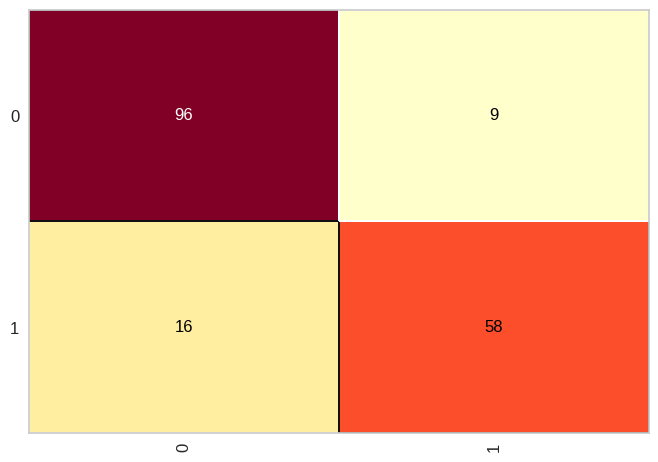

In [35]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [36]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       105
           1       0.87      0.78      0.82        74

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



**Vamos ver os atributos que o Random considerou como mais importantes?**

Variáveis mais relevantes:
Sex: 0.4196846813619313
Fare: 0.2224514365832765
Pclass: 0.14682118697309593
Age: 0.14455598853457585
SibSp: 0.0463309386637381
Embarked: 0.018358779999137723
Parch: 0.0017969878842446052


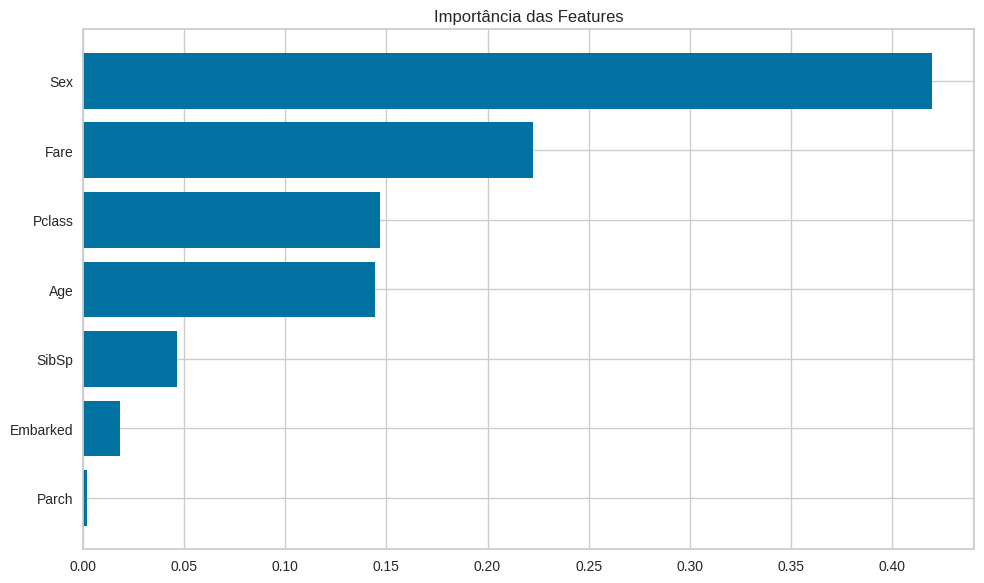

In [37]:
# Obter a importância das features
importancias = modelo.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = X_treino.columns

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
plt.yticks(range(X_treino.shape[1]), nomes_das_features[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()